<a href="https://colab.research.google.com/github/NahiyanNashrah/Data-Science-Lab/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
X = data.iloc[:,[2,3]].values
Y = data.iloc[:,4].values

In [0]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1/3,random_state=0)

In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Create the model for logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

In [0]:
#Predict the test set results
Y_pred = classifier.predict(X_test)

In [0]:
Y_pred

In [0]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)


In [15]:
cm

array([[79,  6],
       [11, 38]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


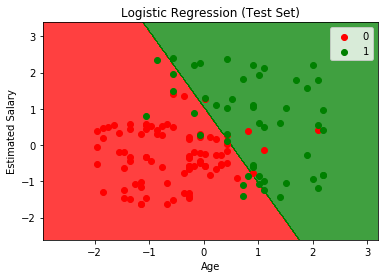

In [17]:
#visualize the test set result
from matplotlib.colors import ListedColormap
X_set, Y_set =X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate (np.unique(Y_set)):
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j,1],
              c = ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()